In [1]:
import re
import numpy as np
import pandas as pd
from collections import defaultdict
import time
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("onlyhash.data", index_col = None, sep = "\t", names = ["user", "date", "hashtag"])

In [3]:
df = df[~df.user.str.startswith("#")]

In [4]:
pattern = re.compile('[:,\.!?]')

df["hashtag"] = df.hashtag.apply(lambda x: pattern.sub("", x))

In [5]:
user_group = df.groupby(by = "user")
dif_days = df.groupby(by = "date")

In [6]:
i = 1

entr_d_i = defaultdict(dict)
entropy_sys = {}

for date_i, date_data in dif_days:
    user_group = date_data.groupby(by = "user")  
        
    #system entropy
    freq_meme_list = date_data.groupby(by = "hashtag").count().user.values / float(len(date_data))
    entropy_sys[date_i] = -1 * sum(freq_meme_list * np.log(freq_meme_list))
    
    #user entropy
    for user_name, user_data in user_group:        
        n = len(user_data)
        
        if n == 1:
            entr_d_i[date_i][user_name] = 0.0
        else:    
            memes = user_data.hashtag.unique()
            if len(memes) == n:
                entr_d_i[date_i][user_name] = np.log(n)
            elif len(memes) == 1:
                entr_d_i[date_i][user_name] = 0.0
            else:
                f_u_list = user_data.groupby(by="hashtag").count().user.values / float(n)
                entr_d_i[date_i][user_name] = -1 * sum(f_u_list * np.log(f_u_list))
    
    i += 1

In [7]:
#average user entropy
userbased_entropy = {}
for date_i in entr_d_i:
    w1 = list(entr_d_i[date_i].values())
    userbased_entropy[date_i] = np.mean(w1)

In [8]:
#ranking days
r = [(rank,entropy_sys[key],key) for rank, key in enumerate(sorted(entropy_sys, key = entropy_sys.get), 1)]
x,y,z = zip(*r)
u_y = [userbased_entropy[k] for k in z]

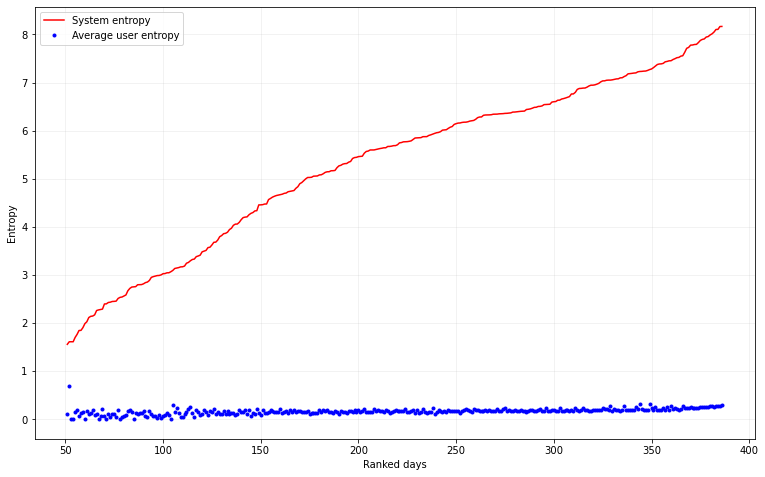

In [9]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

ax.plot(x[50:], y[50:], "r", label="System entropy")
ax.plot(x[50:], u_y[50:], ".b", label="Average user entropy")

ax.set_ylabel("Entropy")
ax.set_xlabel("Ranked days")
ax.legend()
ax.grid(alpha = 0.2)